# **Monkey Species Classification**



### **Context:**
Several species of monkeys have become extinct in recent years. As a result, a wildlife sanctuary in the United States has taken an important step forward in gathering data on all species that are currently endangered. They have collected images of monkeys from several continents. However, it has become difficult for them to organize all of these images into their respective categories. They require a solution to identify these images into their relevant monkey species groups. As a data scientist, you have to create an efficient model to classify these images into their respective categories.

### **Objective:**

Building a Convolutional Neural Network model to classify the monkey species into their respective categories.

### **Data Description:**

This dataset is taken from Kaggle and it consists of the various species of monkeys.
-  Due to the large volume of data, the images were converted to the images.npy file and the labels are also placed in Labels.csv, allowing you to work on the data without being concerned about the large data volume.
- The dataset comprises of 10 monkey species.

**List of Species**
- Mantled Howler
- Patas Monkey
- Bald Monkey
- Japanese Macaque
- Pygmy Marmoset
- White Headed Capuchin
- Silver Marmosetr
- Common Squirrel Monkey
- Black Headed Night Monkey
- Nilgiri Langur



####**Note: Please use GPU runtime to execute the code efficiently** 






## **Importing the necessary libraries**

In [4]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow    
#cv2_imshow is used on google colab
#cv2.imshow is used on jupyter notebook
                                                  # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Reading the dataset**

In [5]:
# Mount Google drive to access the dataset (monkeys_dataset.zip)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/AILEADTECH/materials/images.npy')
# the dataset is stored in form of a single numpy file since images are numpy arrays
# this saves a lot of memory
#np.save is used to save a file with numpy

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/AILEADTECH/materials/Labels.csv')
# the label is a csv data that contains the names on the monkey species in the same order as the images

## **Overview of the dataset**


Let's print the shape of the images and labels 

In [7]:
labels.head()

,Label
0,nilgiri_langur
1,nilgiri_langur
2,nilgiri_langur
3,nilgiri_langur
4,nilgiri_langur


In [8]:
print(f"The shape of the image dataset is {images.shape}")
print(f"The shape of the label dataset which represent the names of each specie is {labels.shape}")


The shape of the image dataset is (1342, 128, 128, 3)
The shape of the label dataset which represent the names of each specie is (1342, 1)


- There are 1342 RGB  images of shape 128 x 128 X 3, each image having 3 channels.
- 3 indicate that the images are colored

## Plotting images using OpenCV and matplotlib

the way openCV reads images is different from the way ,matplotlib reads images
- openCV reads images backwards; in the reverse order i.e BGR -Blue, Green, Red
- matplotlib uses RGB - Red, Green Blue which is the standard format

---



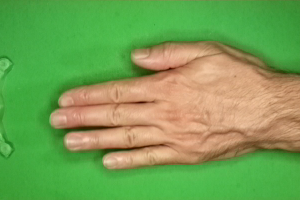

In [9]:
# Use openCV to show an image

# read an image ysing open cv
path = "/content/drive/MyDrive/PRS/paper/04l5I8TqdzF9WDMJ.png"
# load the image
img = cv2.imread(path)
# show the image
cv2_imshow(img)


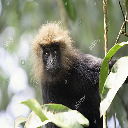

In [10]:
# use openCV to show an image from the monkey dataset
cv2_imshow(images[6])

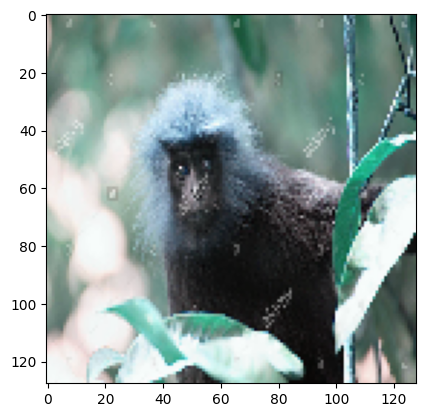

In [11]:
# Use Matplotlib to show the same image
plt.imshow(images[6])



- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- Now we will convert these BGR images to RGB images so we could interpret them easily.

In [12]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

## **Exploratory Data Analysis** 

In [13]:
# names of the unique monkey species in the data?
labels["Label"].unique()

array(['nilgiri_langur', 'mantled_howler', 'common_squirrel_monkey',
       'black_headed_night_monkey', 'pygmy_marmoset', 'japanese_macaque',
       'silvery_marmoset', 'patas_monkey', 'white_headed_capuchin',
       'bald_uakari'], dtype=object)

In [14]:
# How many unique monkey species are in the data?
labels["Label"].nunique()

10

In [15]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

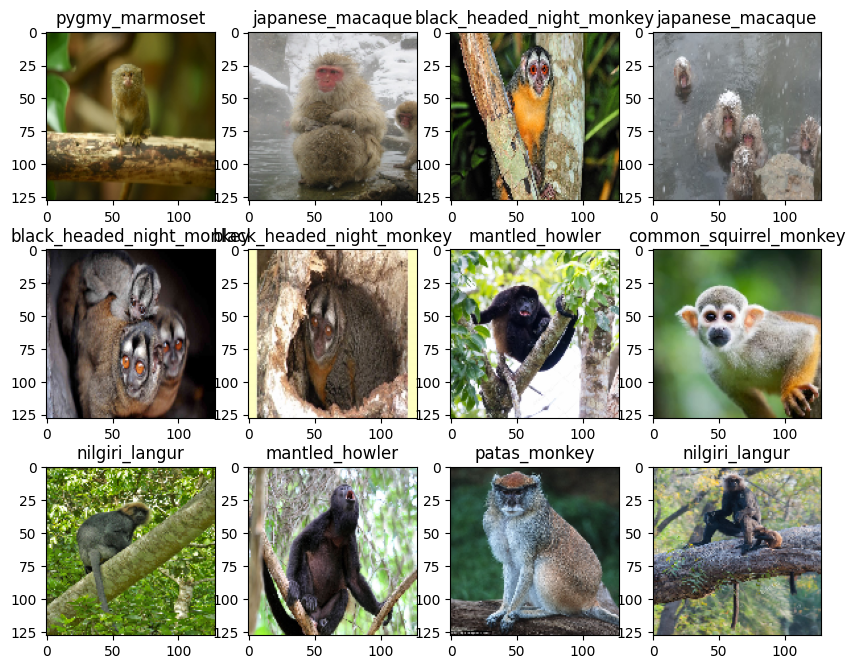

In [16]:
plot_images(images,labels)

<b> Checking for data imbalance

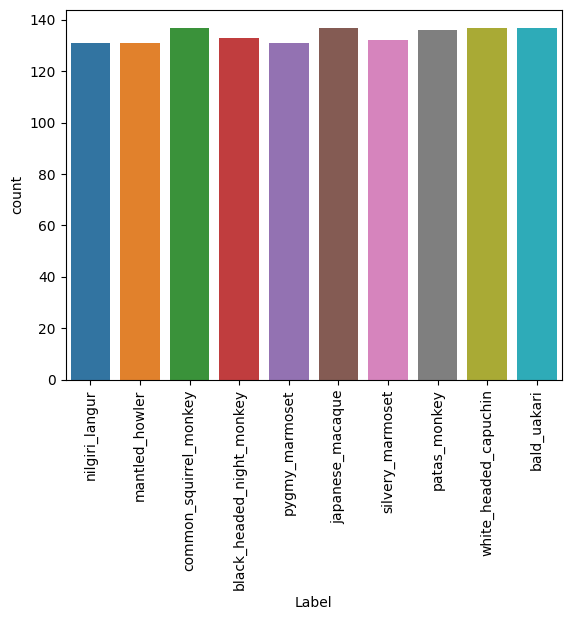

In [17]:
 sns.countplot(x ='Label', data = labels)
 plt.xticks(rotation=90);

- As you can see from the above plot, the dataset is quite balanced. 
- There are about 135 images in each category
- most times in image analysis, the data is always balanced because it is very easy to get images representing all the categories

### Resizing images 
As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [18]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append(cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

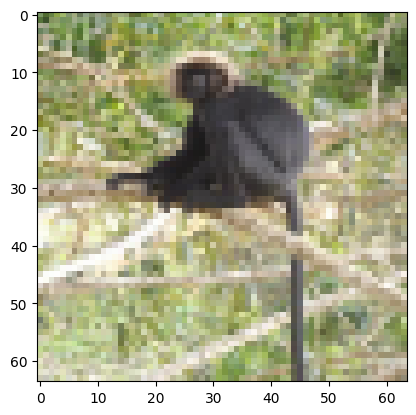

In [19]:
# show one image
plt.imshow(images_decreased[3]);

- the resized image looks blurry, however the model will find it easier to understand and higher sized imaged take time to train 

#### Blurring the images
In computer vision, when an image contains some noise in the background i.e. uneccessarynthig like leafs, trres, at the baachground, blurring the images is necessary so as to reduce the attention of the model from the things that could distract it and allow it to focus on the major image which is the monkey. Sometime, this could be useful, sometime, it is not. Hence, one can build a model without blurring and also try a model with blurred images

## Visualizing images using Gaussian Blur 

In [20]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))
  # note that we are blurring the original images and not the resized one
  # one can also blur the resized images instead


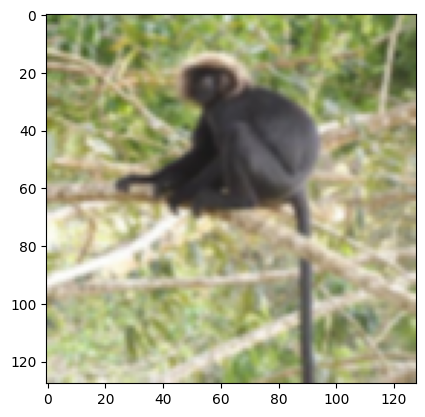

In [21]:
plt.imshow(images_gb[3]);

- It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

## **Splitting the dataset**

- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.


In [22]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)


In [23]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(1086, 64, 64, 3) (1086, 1)
(121, 64, 64, 3) (121, 1)
(135, 64, 64, 3) (135, 1)


## **Making the data compatible:**

- Convert labels from names to one hot vectors
- Normalizing the values


## Encoding the target labels

In [24]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

## Data Normalization
Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [25]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0


## **Model Building - Convolutional Neural Network (CNN)**
Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data. 

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

In [26]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

- the weights are accumulated and stored on the backend during modeling, hence the need to clear backend

In [27]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Now, let's build a **CNN Model** with the following 2 main parts - <br>

1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br><br>


In [28]:
# Intializing a sequential model
model = Sequential()
# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
model.add(Conv2D(128, (3,3), padding="same", activation ="relu", input_shape= (64, 64, 3)))
# Input_shape denotes input image dimension of images
# padding is used to maintain the same dimension after filtering; the default reduces the dimension
# the image dimension reduces, what we just do is similar to adding pads 
# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

# Adding second conv layer with 64 filters and kernel size 3x3 , padding 'same'
model.add(Conv2D(64, (3,3), padding="same", activation ="relu"))
# Adding max pooling to reduce the size of output of second conv layer
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons  and Dropout of 0.3  
model.add(Dense(100, activation = "relu"))
model.add(Dropout (0.2))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(10, activation = "softmax"))

# Using Adam Optimizer
opt = Adam()

# Compile model
model.compile(optimizer = opt, loss="categorical_crossentropy", metrics = ["accuracy"])

# Generating the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                        

In [29]:
# define early stopping layer
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = "val_loss" , patience = 3, mode = "min", verbose = 2)


### <b> Fitting the model on the train data

In [30]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=10,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2, callbacks = [es]
)

Epoch 1/10
34/34 - 32s - loss: 2.7349 - accuracy: 0.3223 - val_loss: 3.0812 - val_accuracy: 0.1074 - 32s/epoch - 953ms/step
Epoch 2/10
34/34 - 28s - loss: 1.2920 - accuracy: 0.6142 - val_loss: 5.0058 - val_accuracy: 0.1322 - 28s/epoch - 832ms/step
Epoch 3/10
34/34 - 29s - loss: 0.7918 - accuracy: 0.7413 - val_loss: 8.6786 - val_accuracy: 0.1157 - 29s/epoch - 847ms/step
Epoch 4/10
34/34 - 29s - loss: 0.4970 - accuracy: 0.8333 - val_loss: 10.5106 - val_accuracy: 0.1240 - 29s/epoch - 854ms/step
Epoch 4: early stopping


- the model was overfitting right from the begin
- it stopped early because the model was not improving
- the result could be due to the number of filters, neurons
- one can reduce the number of filters in the first layer and number of neurons in the dense layer and implement data augmentation

### **Model Evaluation**

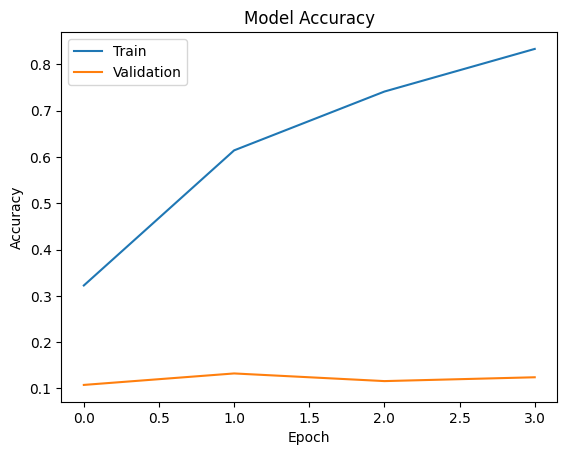

In [31]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 


*   We can see from the above plot that **the training accuracy of the  model was good but the validation accuracy was not good.**
*   The model seems to overfit on the data.






### **Evaluating the model on test data**

In [32]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

5/5 - 1s - loss: 10.4711 - accuracy: 0.1333 - 763ms/epoch - 153ms/step


- the result is not satisfactory enough

### **Generating the predictions using test data**

In [33]:
X_test_normalized.shape

(135, 64, 64, 3)

- for single image on a new real-life data, the dimension is not there so we expand the dimension using use np.expand_dims(img, 1)

In [34]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

5/5 [==============================] - 1s 146ms/step


### **Plotting the Confusion Matrix**

*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.





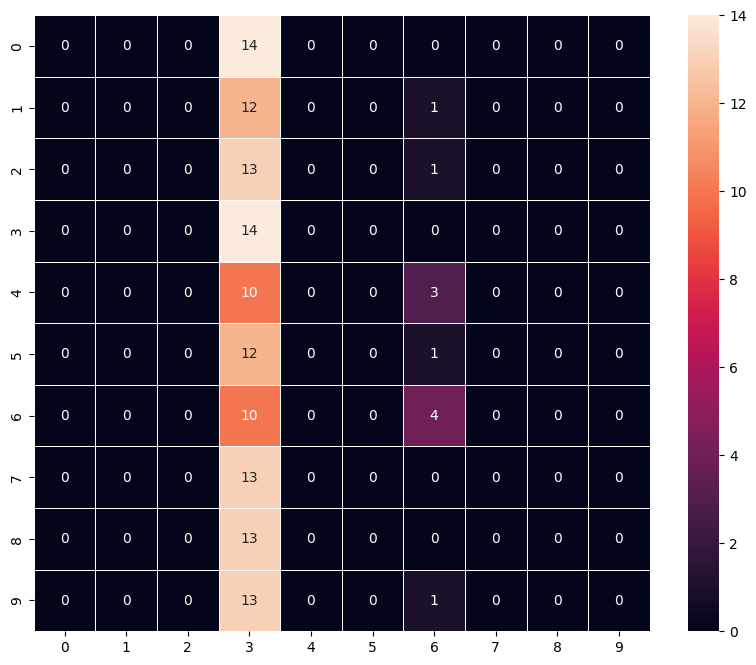

In [35]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- We observe that some of the classes are not predicted correctly. 
- most of the classes were misclassified and confused to be class 3
- We can also observe that classes 1,2,5,7 and 9 are mostly misclassified.

# Model-2

As we can see, our initial model appears to overfit. Therefore we'll try to address this problem with data augmentation and Batch Normalization to check if we can improve the model's performance.

## **Data Augmentation**
involves creating different variants of an image by flipping, zooming, etc. ; for human, if you show a 2 year old child a pcture of a monkey anf if you have another picture of tat monkey turning upside down, the child will know it is a monkey because humans have a more sophisticated conitive ability. However a machine may not understand. We create the model with different variants/ styles so it will be able to understand a particular specie
In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is **Data Augmentation**. CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. <br> Taking this attribute into account, we can augment the images using the techniques listed below - <br>
**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

Remember, **data augmentation should not be used in the validation/test data set**.

In [36]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [37]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=180, 
                              fill_mode='nearest',
                              horizontal_flip = True,
                              vertical_flip = True,
                              shear_range = 0.2,
                              zoom_range = 0.2
                              )
#test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [48]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(10, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                        

In [ ]:
# Epochs
epochs = 25
# Batch size
batch_size = 64
# note that flow is used since the dataset is not stored in a folder
# flow from directory is used for datasets in folders
history = model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)
# steps_per_epoch is used only when data augmentation is implemented to prevent errors
# if the dataset contain 1086 per 64 batch running times, there will be some remainder
# in data augentation, the remainder would bring about errors, that is why step_per_epoch is used to clear the remainders
# the remainder is discarded during normal training without augmentation

Epoch 1/25
16/16 [==============================] - 28s 2s/step - loss: 0.8170 - accuracy: 0.7114 - val_loss: 1.3353 - val_accuracy: 0.5207
Epoch 2/25
16/16 [==============================] - 26s 2s/step - loss: 0.7933 - accuracy: 0.7211 - val_loss: 1.3155 - val_accuracy: 0.4959
Epoch 3/25
16/16 [==============================] - 34s 2s/step - loss: 0.7551 - accuracy: 0.7446 - val_loss: 1.2412 - val_accuracy: 0.5124
Epoch 4/25
16/16 [==============================] - 36s 2s/step - loss: 0.8211 - accuracy: 0.7055 - val_loss: 1.3084 - val_accuracy: 0.5372
Epoch 5/25
16/16 [==============================] - 36s 2s/step - loss: 0.7276 - accuracy: 0.7436 - val_loss: 1.2740 - val_accuracy: 0.5124
Epoch 6/25
16/16 [==============================] - 28s 2s/step - loss: 0.7206 - accuracy: 0.7495 - val_loss: 1.1442 - val_accuracy: 0.5455
Epoch 7/25
16/16 [==============================] - 28s 2s/step - loss: 0.7769 - accuracy: 0.7329 - val_loss: 1.3202 - val_accuracy: 0.4545
Epoch 8/25
16/16 [==

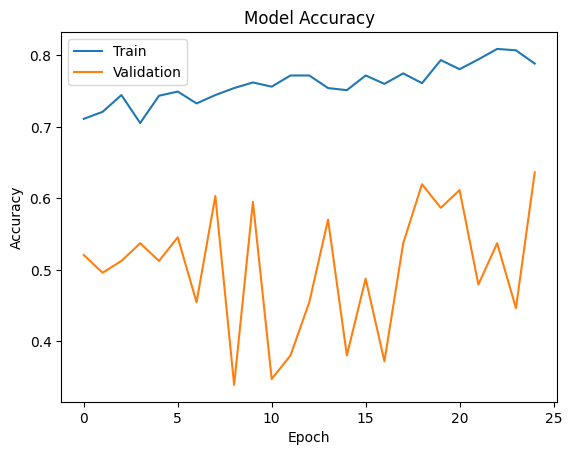

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

5/5 - 1s - loss: 1.4661 - accuracy: 0.5704 - 812ms/epoch - 162ms/step


We can observe that our accuracy has improved compared to our previous model.

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

5/5 [==============================] - 1s 236ms/step


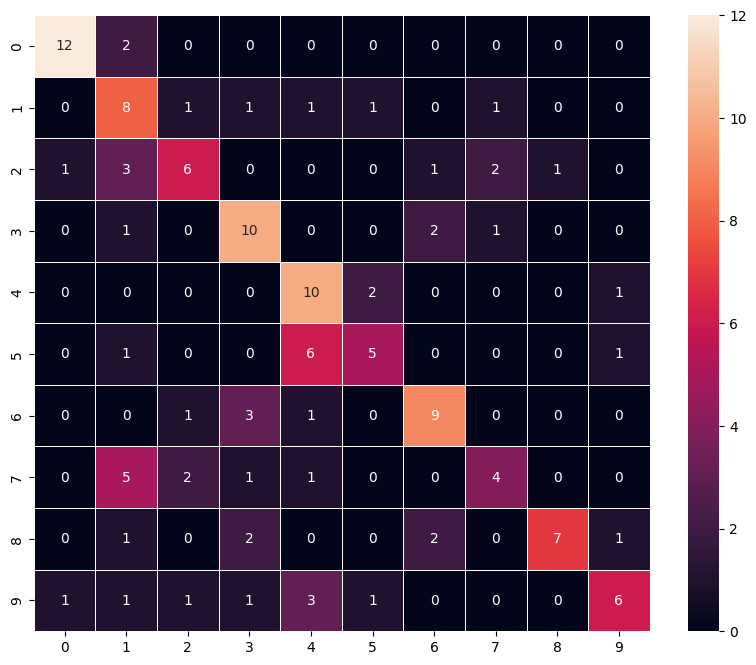

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observation:**
- the diagonal is okay since the classificatio are correct
- Specie 2 is mis-classified 3 times as 1
- Specie 5 is mis-classified 5 times as 4
- Specie 7 is mis-classified 5 times as 1
- Specie 9 is mis-classified 3 times as 4
- Specie 3 is mis-classified 2 times as 6
The confusion matrix appears to be improving as well, however there is still some confusion with the 3,5,7 classes of monkey species.
- The 5th class is the most confused class among all.
- We can observe that this model has outperformed our previous model.

# Transfer Learning using VGG16

- Let's try again, but this time, we will be using the idea of **Transfer Learning**. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.


In [38]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
# include_top: 1000 classes are in vgg16, setting it to false is necessary because our target has 10 classes
vgg_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [39]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False
# freezing the network so as to maintain all the weights that has already been learned on vgg16 while training my model
# if the layer is not freezed, it is going to re-train the network on the data; this is known as fine-tuning
# fine-tuning is another type of transfer learning
# it is possible that the model will not perform well when you extract features of images from a different model since the images are different from your new dataset
# fine-tuning is very common in the industry since in most cases the images in your dataset are unique from previous work
# hence in fine tuning, we employ the convolutional layers from previous model (vgg16), then retrain on your own images without freezing the layers
# it is still more beneficial because the pretrained network contains large dataset and the new model will still inherit
# 1. early features from the model; first 2 convulational layers extract simple features from images
# the early CONV layers dont learn specialized features/ patterns, they learn general features from mostly all images
# hence they are still be retrained on new images and give same benefits
# another type of fine tunings deals with freezing only the early layers (first 3); so as not to retrain all the CONV layers
# the remaining blocks will be retrained on our new model

In [40]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(64, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(32, activation='relu'))
new_model.add(Dense(10, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 14,848,234
Trainable params: 133,546
Non-t

In [41]:
# Epochs
epochs = 10
# Batch size
batch_size = 64

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/10
16/16 [==============================] - 60s 4s/step - loss: 2.3188 - accuracy: 0.1429 - val_loss: 2.1532 - val_accuracy: 0.2231
Epoch 2/10
16/16 [==============================] - 62s 4s/step - loss: 2.1637 - accuracy: 0.2074 - val_loss: 1.9902 - val_accuracy: 0.3306
Epoch 3/10
16/16 [==============================] - 62s 4s/step - loss: 2.0193 - accuracy: 0.2730 - val_loss: 1.8984 - val_accuracy: 0.3719
Epoch 4/10
16/16 [==============================] - 62s 4s/step - loss: 1.9542 - accuracy: 0.2935 - val_loss: 1.8084 - val_accuracy: 0.3967
Epoch 5/10
16/16 [==============================] - 65s 4s/step - loss: 1.8683 - accuracy: 0.3395 - val_loss: 1.7715 - val_accuracy: 0.4380
Epoch 6/10
16/16 [==============================] - 59s 4s/step - loss: 1.8053 - accuracy: 0.3483 - val_loss: 1.7696 - val_accuracy: 0.3802
Epoch 7/10
16/16 [==============================] - 62s 4s/step - loss: 1.7697 - accuracy: 0.3738 - val_loss: 1.6892 - val_accuracy: 0.4380
Epoch 8/10
16/16 [==

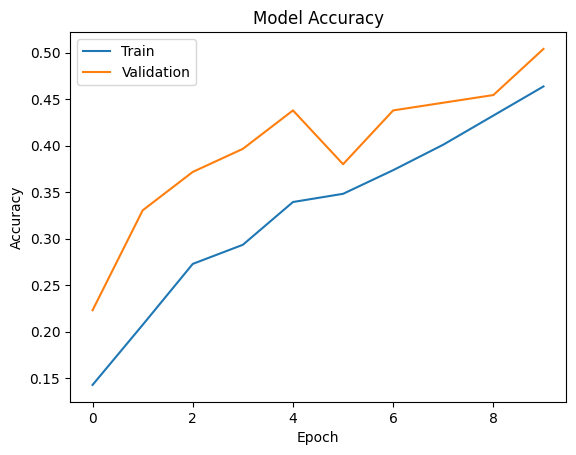

In [42]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- the transfer learning result is still more reliable because the validation performance is better than the training performance

In [43]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

5/5 - 11s - loss: 1.4657 - accuracy: 0.5037 - 11s/epoch - 2s/step


In [44]:
# Here we would get the output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

5/5 [==============================] - 6s 1s/step


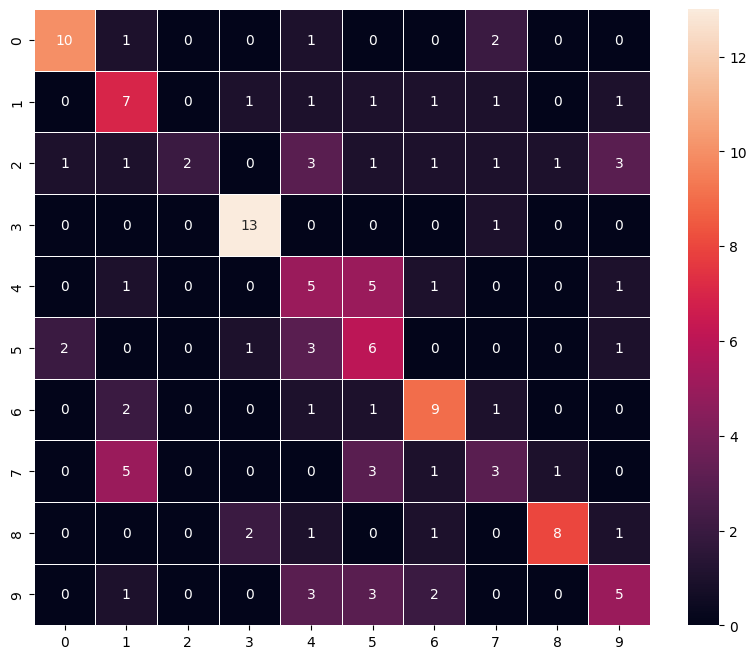

In [45]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

- According to the confusion matrix and accuracy curve, the VGG16 model has outperformed Model-2.
- Thus we can say that VGG16 is our best model and we can use this model to predict and visualize some test images.

## **Visualizing the prediction:**

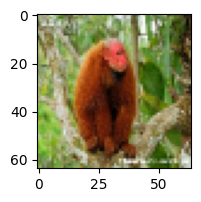

1/1 [==============================] - 0s 80ms/step
Predicted Label ['bald_uakari']
True Label bald_uakari


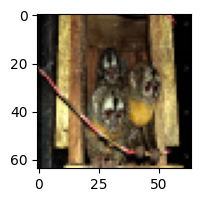

1/1 [==============================] - 0s 80ms/step
Predicted Label ['black_headed_night_monkey']
True Label black_headed_night_monkey


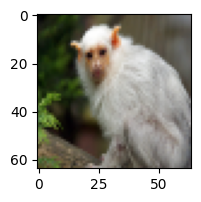

1/1 [==============================] - 0s 86ms/step
Predicted Label ['silvery_marmoset']
True Label silvery_marmoset


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Conclusion
- We can observe from the confusion matrix of all the models that our VGG16 model was the best model because it predicted the majority of the classes better than the other models.
- The test accuracy of the VGG16 model is 63%.
- Data Augmentation has also helped in improving the model.
- Simply employing the transfer learning model can produce a better outcome than any ordinary CNN.

In [ ]:
pd.DataFrame({'Models':['Base CNN Model','CNN Model with Data Augmentation','Transfer Learning Model'],'Train Accuracy':['64%','70%','77%'],'Validation Accuracy':['48%','53%','63%'],'Test Accuracy':['51%','62%','63%']})

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,Base CNN Model,64%,48%,51%
1,CNN Model with Data Augmentation,70%,53%,62%
2,Transfer Learning Model,77%,63%,63%


## Scope of Improvement
- These models can be further improved by training with different filter sizes and different number of filters. 
- These models can also be trained on the original image_size i.e 128 x 128 rather than being reduced to 64.
- Data Augmentation can be performed more and dropout_rate can be changed to improve the model performance.
- Other Transfer Learning architectures can also be used to train the CNN model and these models can be used for classification.

### Hyper-parameter tuning with Keras-tuner
- Implement it on the best performing model i.e. vgg16
- tuning the number of neurons
- tuning the learning rate
- number of filters can be tuned if you are not working on the vgg16 model

In [46]:
# installing keras-tuner
! pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 7.1 MB/s eta 0:00:00


#### Import the required packages

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch, Hyperband

#### Model Architecture

In [48]:
def build_model_vgg(hp):
  # hp represents hyperparameter
  model = Sequential()
  # Adding the convolutional part of the VGG16 model from above
  model.add(vgg_model)
  # Flattening the output of the VG16 model because it is from a convolutional Layer 
  model.add(Flatten())

  #Adding a dense output layer
  hp_units = hp.Int("hidden units", min_value = 32, max_value =256, step =32)
  model.add(Dense(units=hp_units, activation = "relu"))
  model.add(Dropout (0.2))
  hp_units2 = hp.Int("hidden units", min_value = 32, max_value =256, step =32)
  model.add(Dense(units=hp_units2, activation = "relu")) 
  model.add(Dense(10, activation = "softmax"))
  hp_lr = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
  model.compile(optimizer=keras.optimizers.Adam(learning_rate = hp_lr),
                loss="categorical_crossentropy", metrics= ["accuracy"])
  return model

#### Define the search space using Random Search

In [49]:
tuner =  RandomSearch(build_model_vgg,
                   objective="val_accuracy", # can also try val_loss
                   max_trials = 5, # default is 10
                   executions_per_trial =3,
                   directory = "/content/drive/MyDrive/AILEADTECH/materials/", 
                   project_name = "keras-tuner")

#### Define the search space using Hyderband

In [50]:
tuner_hb = Hyperband( build_model_vgg,
                     objective = "val_accuracy",
                     max_epochs= 5,
                     directory="/content/drive/MyDrive/AILEADTECH/materials/",
                     project_name = "Hyperband")

In [51]:
tuner.search(X_train_normalized,y_train_encoded, epochs = 10, 
                validation_data= (X_val_normalized,y_val_encoded),
                callbacks = [es])

In [53]:
# tuner_hb.search(X_train_normalized,y_train_encoded, epochs = 10, 
#                 validation_data= (X_val_normalized,y_val_encoded),
#                 callbacks = [es])

#### Get the best hyperparameters

In [54]:
best_hp = tuner.get_best_hyperparameters()[0]

#### Rebuilding and Training the Model with best hyperparameters

In [55]:
# build the model with the optimal hyperparameters 
h_model = tuner.hypermodel.build(best_hp) 
h_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 96)                196704    
                                                                 
 dropout_1 (Dropout)         (None, 96)                0         
                                                                 
 dense_4 (Dense)             (None, 96)                9312      
                                                                 
 dense_5 (Dense)             (None, 10)                970       
                                                                 
Total params: 14,921,674
Trainable params: 206,986
Non

- 96 was chosen as the best unit

In [56]:
batch_size = 64
history_tuning = h_model.fit(X_train_normalized, y_train_encoded, 
                             epochs = 10, verbose= 2, 
                             steps_per_epoch=X_train_normalized.shape[0] // batch_size, 
                             validation_data= (X_val_normalized,y_val_encoded), 
                             callbacks = [es])

Epoch 1/10
16/16 - 73s - loss: 2.1978 - accuracy: 0.2090 - val_loss: 1.9830 - val_accuracy: 0.3471 - 73s/epoch - 5s/step
Epoch 2/10
16/16 - 69s - loss: 1.8203 - accuracy: 0.3867 - val_loss: 1.6897 - val_accuracy: 0.4959 - 69s/epoch - 4s/step
Epoch 3/10
16/16 - 66s - loss: 1.5346 - accuracy: 0.4715 - val_loss: 1.5600 - val_accuracy: 0.5124 - 66s/epoch - 4s/step
Epoch 4/10
16/16 - 63s - loss: 1.3569 - accuracy: 0.5414 - val_loss: 1.5021 - val_accuracy: 0.5289 - 63s/epoch - 4s/step
Epoch 5/10
16/16 - 64s - loss: 1.1826 - accuracy: 0.6271 - val_loss: 1.3957 - val_accuracy: 0.5207 - 64s/epoch - 4s/step
Epoch 6/10
16/16 - 66s - loss: 1.0597 - accuracy: 0.6538 - val_loss: 1.2981 - val_accuracy: 0.5207 - 66s/epoch - 4s/step
Epoch 7/10
16/16 - 64s - loss: 0.9240 - accuracy: 0.7228 - val_loss: 1.2853 - val_accuracy: 0.5702 - 64s/epoch - 4s/step
Epoch 8/10
16/16 - 63s - loss: 0.8305 - accuracy: 0.7422 - val_loss: 1.2723 - val_accuracy: 0.5702 - 63s/epoch - 4s/step
Epoch 9/10
16/16 - 63s - loss: 0

- there is slight overfitting; however, the difference between the two accuracies is no too much
- 4 model have been built so far
- in real-world, we keep tuning and creating more model even if the validation accuracy is 97 percent. The 3 percent means a lot

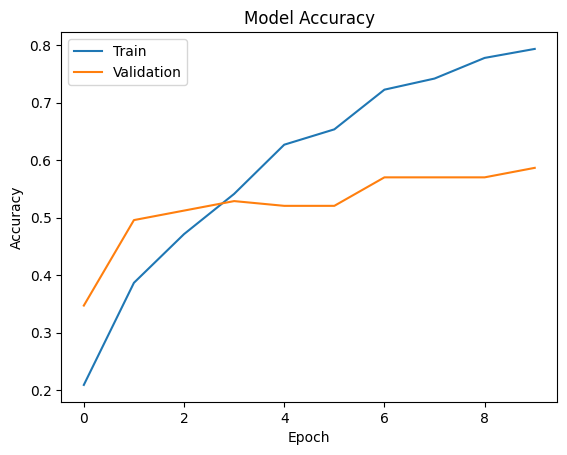

In [57]:
plt.plot(history_tuning.history['accuracy'])
plt.plot(history_tuning.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()